## Topic preference score & Topic heatmap

In [1]:
import pandas as pd 
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
folder = "/home/linyu.linyu/health/data/cls_output/topic_out/"
folder = "/home/linyu.linyu/health.research/health/data/cls_output/topic_out"
topic_scores = json.loads( open( folder + "/topic40_output.json", "r").read() )
topic_names = pd.read_csv( folder + "/topic_models.csv" )

In [3]:
topic_scores.keys()
topic_names.columns
topic_names['Topic_idx'] = topic_names['Topic_prevalence'].apply( lambda x: int( x.strip().split(" ")[1] ) )

In [4]:
topic_names['Prevalence_score'] = 0
topic_names['Coherence_score'] = 0

for i in range(40):
    topic_names['Prevalence_score'].iloc[i] = topic_scores['rel_topic_preference_score'][topic_names['Topic_idx'].iloc[i]]
    

/home/linyu.linyu/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
local_path = "/home/linyu.linyu/desktop/tmp/topic_prevalence.csv"
#topic_names.to_csv(local_path)
topic_names.head(40) 
#topic_scores['']


,Unnamed: 0,Aggregated_meta_topic,Aggregated_topic,Topic_name,Top_3_stemmed_keywords,Topic_prevalence,Topic_idx,Prevalence_score,Coherence_score
0,0,Natural disasters,Natural disaster,Natural disaster,"disaster, natural, review",topic 23,23,1.781540,0
1,1,Natural disasters,Heat waves,Heat waves,"heat, wave, temperature",topic 2,2,0.781942,0
2,2,Natural disasters,Earthquake,Nepal and Aquila earthquake,"earthquake, nepal, aquila",topic 10,10,1.665045,0
3,3,Natural disasters,Nuclear disaster,Fukushima nuclear disaster,"fukushima, evacuation, nuclear",topic 15,15,0.897653,0
4,4,Natural disasters,Tsunami,Japan tsunami,"tsunami, Japan, east",topic 8,8,1.396157,0
5,5,Natural disasters,Dust storms,Dust storms,"dust, storm, admission",topic 17,17,0.732289,0
6,6,Natural disasters,Tornado,Joplin tornado,"tornado, outbreak, joplin",topic 24,24,0.483810,0
7,7,Natural disasters,Extreme weather,Extreme weather,"extreme, weather, climate",topic 32,32,0.888863,0
8,8,Natural disasters,Flood,Flood,"flood, dysentery, flooding",topic 6,6,1.119432,0
9,9,Natural disasters,Hurricane,Hurricane Sandy,"sandy, hurricane, new",topic 26,26,0.769397,0


In [6]:
print( topic_names["Aggregated_meta_topic"].value_counts() )
## Natural disasters         12
## Health risks and impacts    15 [2 PTSD] -> 14
## Coping and responses        13 [2 Posttraumatic growth] -> 12

Health risks and impacts    15
Coping and responses        13
Natural disasters           12
Name: Aggregated_meta_topic, dtype: int64


In [7]:
used_topic_names = topic_names['Topic_name'].drop_duplicates(keep='first')
x_names = [str(x) for x in used_topic_names.tolist() ]
#len(used_topic_names)
## only pick max values for dumplicate topic 
y_axis = [  topic_names[topic_names['Topic_name']== topic]['Prevalence_score'].max()  for topic in x_names ]
x_names = [x.strip() for x in x_names ]

## rescale
rescale_ratio = 38 / 40
y_axis = [ v * rescale_ratio for v in y_axis ]

#x_names[-1], y_axis[-1]
sum(y_axis)

36.092787884707491

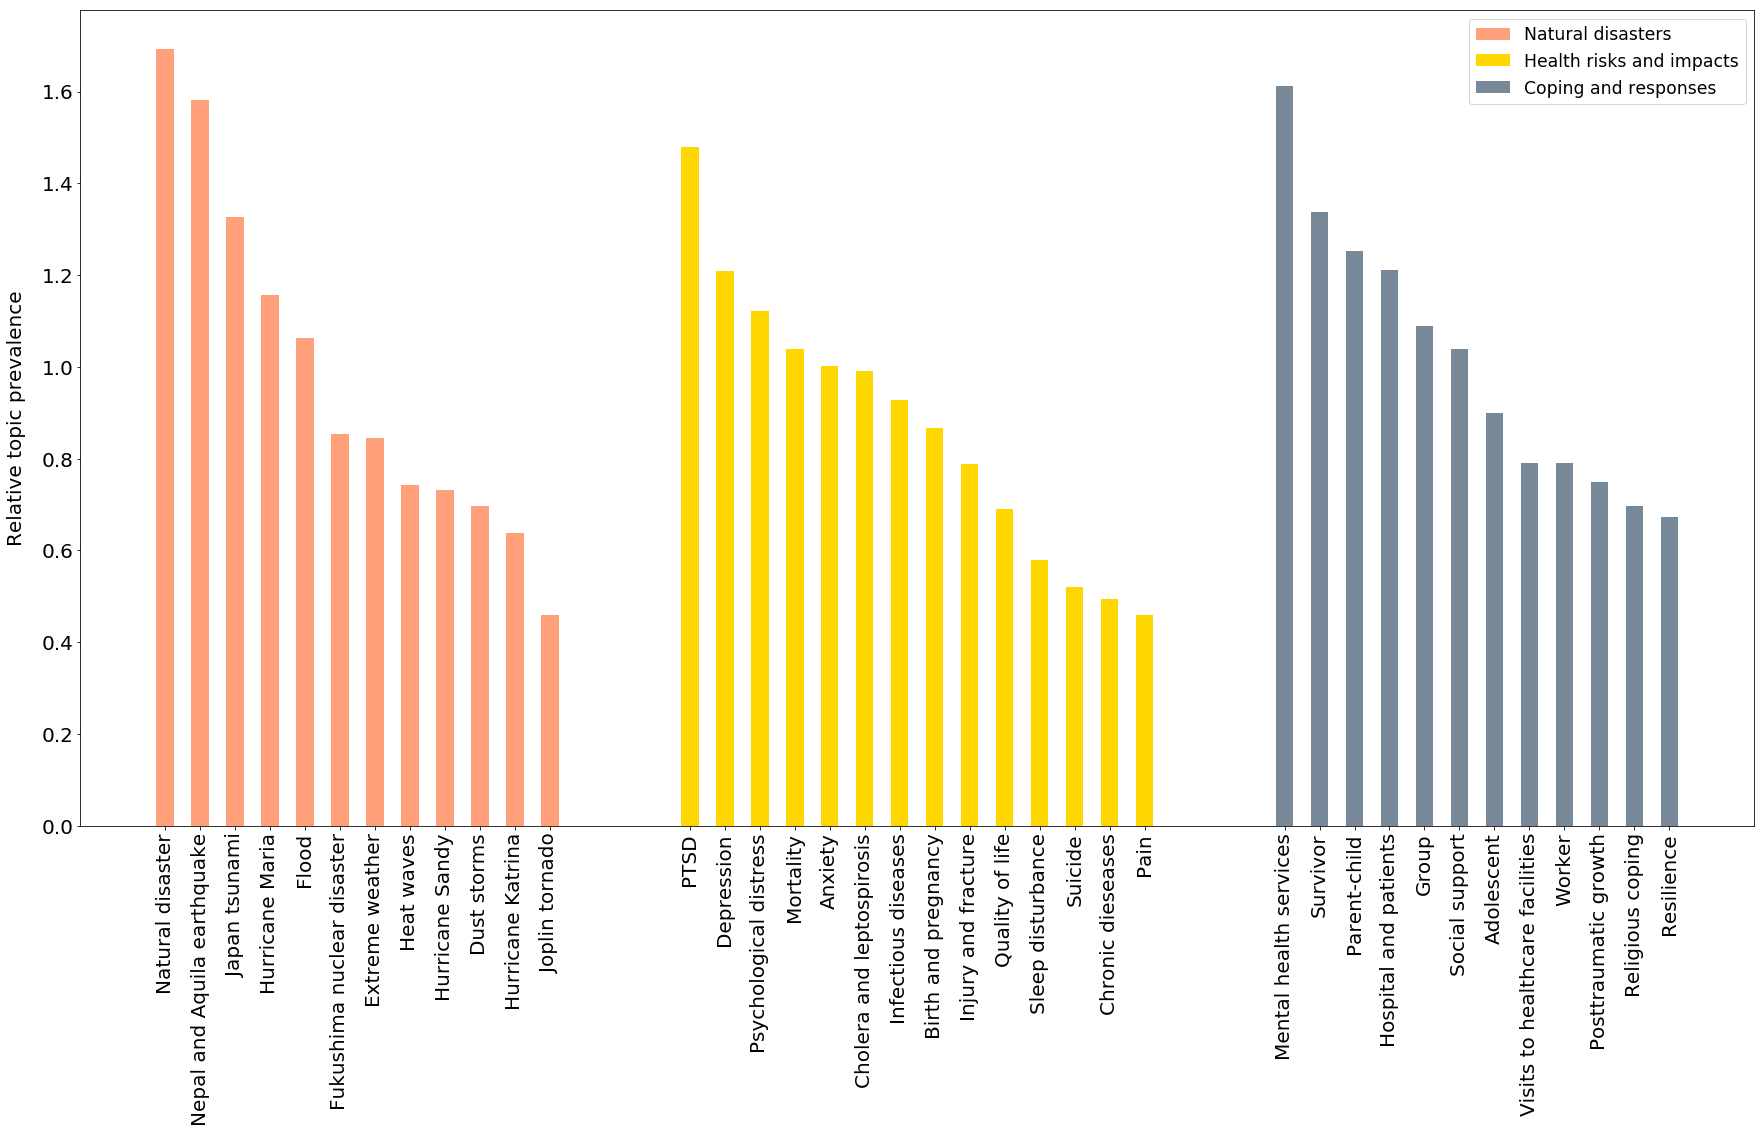

In [12]:
def values_inner_sort(x, y, split=[12, 18, 10] ):

    x_split = [ x[:split[0]], x[split[0]:split[0]+split[1]], x[-split[-1]:] ]
    y_split = [ y[:split[0]], y[split[0]:split[0]+split[1]], y[-split[-1]:] ]
    
    for i in range(3):
        x_y = list( zip(y_split[i], x_split[i]) )
        x_y.sort(reverse=True)
        y_, x_ = zip(*x_y)
        x_split[i] = x_ 
        y_split[i] = y_
    
    x_out = []
    y_out = []
    for i in range(3):
        x_out.extend(x_split[i])
        y_out.extend(y_split[i])
    return x_out, y_out
        
#x_names = [str(x).strip() for x in topic_names['Topic_name'].tolist() ]
#y_axis = topic_names['Prevalence_score'].tolist()
#split_lst = [12, 18, 10]

split_lst = [ 12, 14, 12 ]
accumulate_lst = [12, 26, 38]
x_names, y_axis = values_inner_sort( x_names, y_axis, split=split_lst )

mid=10; group_mid = 30
x_axis=list( range(0,len(x_names)*mid,mid) )
for i in range(accumulate_lst[0], accumulate_lst[2] ): 
    x_axis[i] += group_mid
for i in range(accumulate_lst[1], accumulate_lst[2] ): 
    x_axis[i] += group_mid

#color = ['coral'] * 12 + ['lightslategrey'] * 18 + ['peachpuff'] * 10
color = ['lightsalmon'] * split_lst[0] + ['gold'] * split_lst[1] + ['lightslategrey'] * split_lst[2]

## https://zhuanlan.zhihu.com/p/65220518
fig, ax = plt.subplots() #dpi=150, figsize=(12,6))
#plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams["figure.figsize"] = (30,15)
#plt.bar( x_axis, y_axis, width=5.0, color = color )   ## #tick_label=x_axis
labels = ["Natural disasters", "Health risks and impacts", "Coping and responses"]

for i in range(3):
    st = 0 if i == 0 else accumulate_lst[i-1]
    ed = accumulate_lst[i]
    plt.bar( x_axis[st:ed], y_axis[st:ed], width=5.0, color = color[st:ed], label=labels[i] ) 
 

plt.xticks(x_axis, x_names, rotation=90, fontsize=20 )
plt.yticks(fontsize=20)
plt.ylabel("Relative topic prevalence", labelpad=15, fontsize=20)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., fontsize="large")
plt.legend(loc='best',fontsize="xx-large")
#### plt.legend(loc='best',prop={'size': 20}, bbox_to_anchor=(0.98,0.95))


# from matplotlib.backends.backend_pdf import PdfPages
# file_path="/home/linyu.linyu/health/data/cls_output/figure_out/figure2.pdf"
file_path = "/home/linyu.linyu/health.research/health/data/cls_output/figure_out/figure2.pdf"
plt.savefig(file_path,dpi=250,bbox_inches="tight")

#pp = PdfPages(file_path)
#pp.savefig(fig)
#pp.close()

plt.show()

## Relative topic prevalence
## 加上颜色的图例
## 不同 colunms group 之间分开

## figure 6 Heatmap of topic

In [13]:
topic_scores.keys()

dict_keys(['topic2words', 'topic_preference_score', 'doc2topic', 'topic_key_words', 'topic_word_weights', 'word_dic', 'rel_topic_preference_score'])

In [14]:
doc2topic = np.array( topic_scores['doc2topic'] )
doc2topic_argsort = np.argsort( -doc2topic, axis=1 )

In [34]:
score_th = 0.015

topic_names['Aggregated_meta_topic'] = topic_names['Aggregated_meta_topic'].apply(lambda x: str(x).strip())
topic_names['Topic_name'] = topic_names['Topic_name'].apply(lambda x: str(x).strip())
labels = ["Natural disasters", "Health risks and impacts", "Coping and responses"]

def combine_dulplicate_names(index, names):
    new_names = []
    new_index = []
    name2id = dict()
    for idx, name in zip(index, names):
        name = name.strip()
        if name not in name2id:
            name2id[name] = len(new_names)
            new_names.append(name)
            new_index.append([idx])
        else:
            new_index[name2id[name]].append(idx)
    return new_index , new_names  

health_topic = topic_names[topic_names.Aggregated_meta_topic == "Health risks and impacts"]
health_topic = health_topic.sort_values(by=['Prevalence_score'], ascending=False)
health_topic_index = health_topic['Topic_idx'].tolist()
health_topic_names = health_topic['Topic_name'].tolist()
health_topic_index, health_topic_names = combine_dulplicate_names(health_topic_index, health_topic_names)

disaster_topic = topic_names[topic_names.Aggregated_meta_topic == "Natural disasters"]
disaster_topic = disaster_topic.sort_values(by=['Prevalence_score'], ascending=False)
disaster_topic_index = disaster_topic['Topic_idx'].tolist()
disaster_topic_names = disaster_topic['Topic_name'].tolist()
disaster_topic_index, disaster_topic_names = combine_dulplicate_names(disaster_topic_index, disaster_topic_names)

option_topic = topic_names[topic_names.Aggregated_meta_topic == "Coping and responses"]
option_topic = option_topic.sort_values(by=['Prevalence_score'], ascending=False)
option_topic_index = option_topic['Topic_idx'].tolist()
option_topic_names = option_topic['Topic_name'].tolist()
option_topic_index, option_topic_names = combine_dulplicate_names(option_topic_index, option_topic_names)

combine_topic_index = disaster_topic_index + option_topic_index
combine_topic_names = disaster_topic_names + option_topic_names

x_axis_cnt = len(health_topic_index)
y_axis_cnt = len(combine_topic_index)

doc_counts = np.zeros((x_axis_cnt, y_axis_cnt), dtype=np.int)
for plt_i, topic_is in enumerate(health_topic_index):
    for plt_j, topic_js in enumerate(combine_topic_index):
        for topic_i in topic_is:
            for topic_j in topic_js:
                topic_related_x = doc2topic[:,topic_i] >= score_th
                topic_related_y = doc2topic[:,topic_j] >= score_th
                topic_both_related = sum( topic_related_x & topic_related_y)
                doc_counts[plt_i,plt_j] += int(topic_both_related)

In [35]:
combine_topic_index


[[23],
 [10],
 [8],
 [5],
 [6],
 [15],
 [32],
 [2],
 [26],
 [17],
 [20],
 [24],
 [1],
 [35],
 [4],
 [3],
 [31],
 [11],
 [29],
 [19],
 [37],
 [18, 7],
 [33],
 [9]]

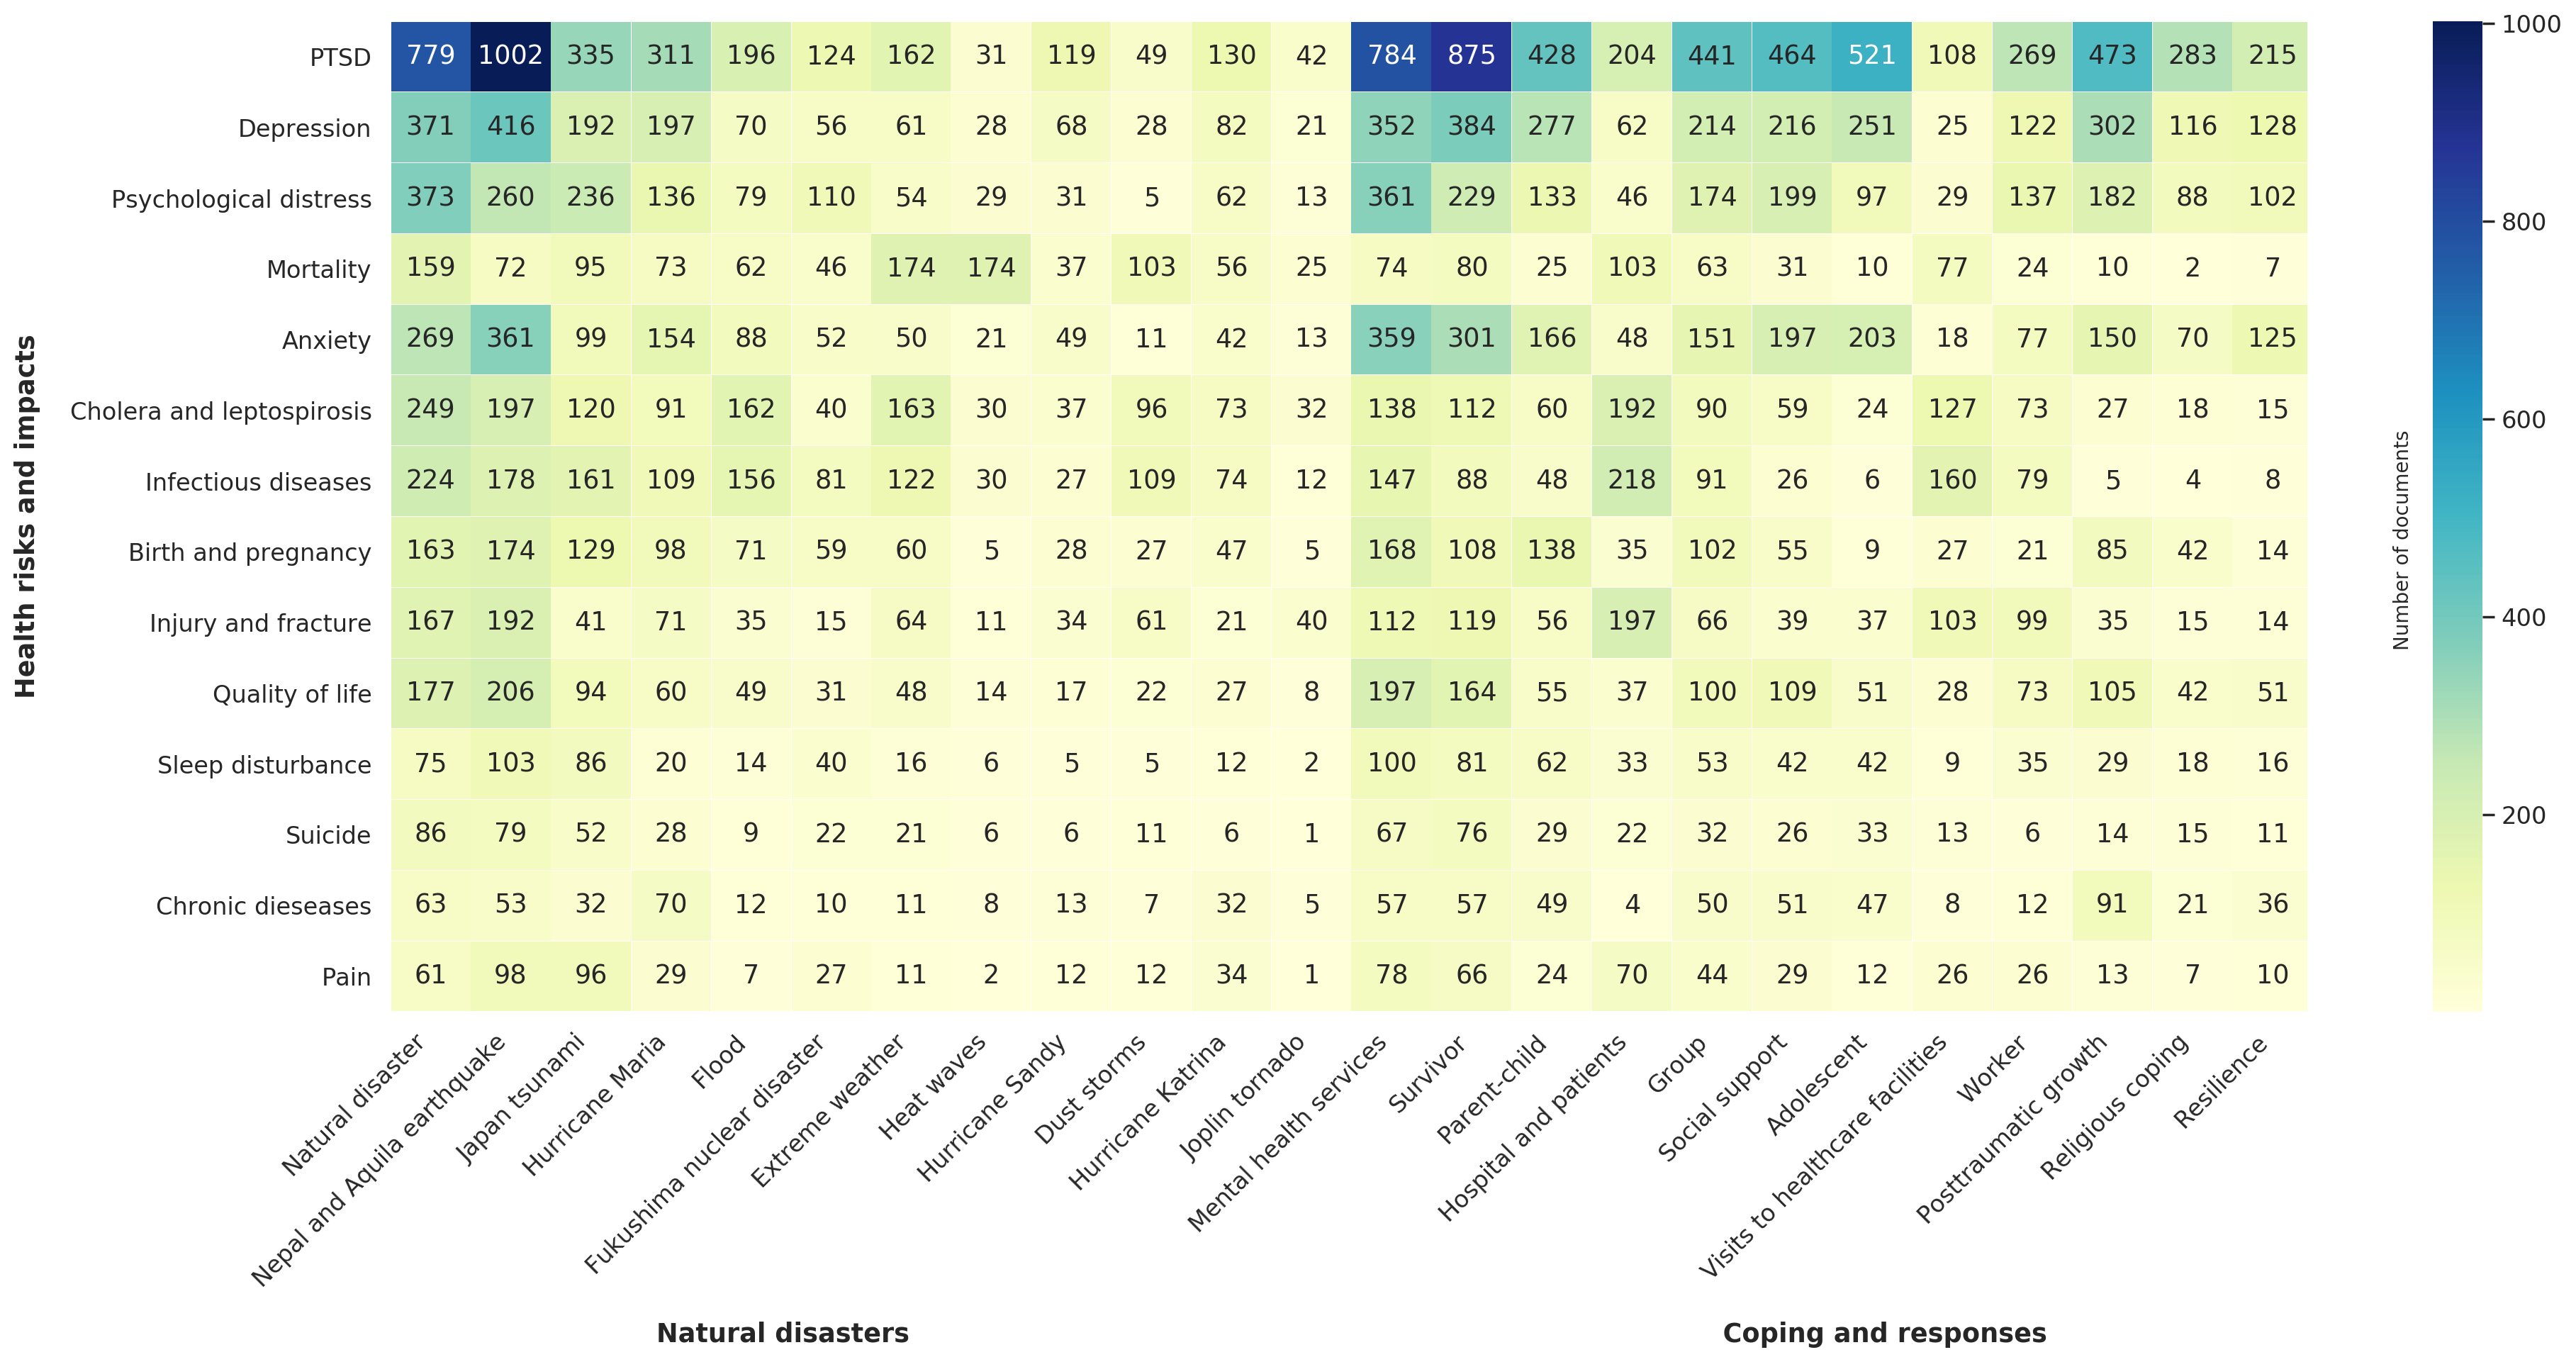

(<Figure size 4000x2000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdfc86bee80>)

In [36]:
def TitleAndSave(fig, ax, title, subtitle, file_path=None):
    #ax.text(x=0.5, y=1.1, s=title, fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=1.05, s=subtitle, fontsize=10, ha='center', va='bottom', transform=ax.transAxes)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    #fig.savefig(f'heatmap_results/Final/{title}_{subtitle}.png')
    if file_path:
        fig.savefig(file_path, dpi=250, bbox_inches="tight")
    plt.show()
    return fig, ax
    

yticks = health_topic_names
xticks = combine_topic_names
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(20,10),dpi=200)

ax.axvline(doc_counts.shape[1], color='white', lw=6)
sns.heatmap(doc_counts, 
            ax=ax, 
            cmap="YlGnBu",annot=True, fmt="d",
            linewidths=0.001,
           )

ax.set_xticklabels(xticks, rotation=45, ha="right")
ax.set_yticklabels(yticks, rotation=0)


x_label = 'Natural disasters' + "".join([" "] * 90) + 'Coping and responses'
plt.xlabel(x_label, weight = 'bold', labelpad=15,)
plt.ylabel('Health risks and impacts', weight = 'bold', labelpad=15,)

###ax2 = ax.twinx()
###ax2.set_ylabel("Number of documents", labelpad=15)
plt.text( 25, 6, "Number of documents", rotation=90, fontsize=10 )

###title = 'Co-occurrence of Hazards and Health Risks & Impacts'
###subtitle = "Number of documents with co-occuring topics above threshold %.3f"%(score_th)
###file_path = "/home/linyu.linyu/health/data/cls_output/figure_out/figure6A.pdf"
title=subtitle=None
file_path="/home/linyu.linyu/health.research/health/data/cls_output/figure_out/figure6A.pdf"
TitleAndSave(fig, ax, title, subtitle, file_path)

In [38]:
health_topic = topic_names[topic_names.Aggregated_meta_topic == "Health risks and impacts"]
health_topic.head()

,Unnamed: 0,Aggregated_meta_topic,Aggregated_topic,Topic_name,Top_3_stemmed_keywords,Topic_prevalence,Topic_idx,Prevalence_score,Coherence_score
12,12,Health risks and impacts,Quality of life,Quality of life,"qol, life, quality",topic 34,34,0.726785,0
13,13,Health risks and impacts,PTSD,PTSD,"ptsd, disorder, prevalence",topic 0,0,1.556343,0
14,14,Health risks and impacts,PTSD,PTSD,"disorder, traumatic, post",topic 25,25,1.295958,0
15,15,Health risks and impacts,Psychological distress,Psychological distress,"distress, psychological, participant",topic 21,21,1.179719,0
16,16,Health risks and impacts,Psychological distress,Depression,"symptom, depressive, stress",topic 30,30,1.271823,0


In [39]:
def topic_group(data):
    data['Aggregated_topic'] = data['Aggregated_topic'].apply( lambda x: str(x).strip() )
    data = data.groupby('Aggregated_topic').aggregate(list)
    data['Prevalence_score'] = data['Prevalence_score'].apply(sum)
    data = data.sort_values(by=['Prevalence_score'], ascending=False)
    topic_index = data['Topic_idx'].tolist()
    topic_names = data.index.tolist()
    return topic_index, topic_names
    
def TitleAndSave(fig, ax, title, subtitle,  file_path=None):
    #ax.text(x=0.5, y=1.1, s=title, fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=1.05, s=subtitle, fontsize=10, ha='center', va='bottom', transform=ax.transAxes)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    if file_path:
        fig.savefig(file_path, dpi=250, bbox_inches="tight")
    #fig.savefig(f'heatmap_results/Final/{title}_{subtitle}.png')
    plt.show()
    return fig, ax
    
def heat_map_plot(
    x_index, x_names, y_index, y_names, 
    x_label="x_label",
    y_label="y_label",
    file_path=None,
    plt_loc=None,
    ):

    x_axis_cnt = len(x_index)
    y_axis_cnt = len(y_index)
    doc_agg_counts = np.zeros((x_axis_cnt, y_axis_cnt), dtype=np.int)
    for plt_i, topic_i_list in enumerate(x_index):
        for plt_j, topic_j_list in enumerate(y_index):
            doc_cnt = 0
            for topic_i in topic_i_list:
                for topic_j in topic_j_list:
                    topic_related_x = doc2topic[:,topic_i] >= score_th
                    topic_related_y = doc2topic[:,topic_j] >= score_th
                    topic_both_related = sum( topic_related_x & topic_related_y)
                    doc_cnt += topic_both_related
            doc_agg_counts[plt_i,plt_j] = doc_cnt
    

    yticks = x_names #health_agg_names
    xticks = y_names #combine_agg_names
    sns.set(font_scale=1.1)
    fig, ax = plt.subplots(figsize=(20,10),dpi=250)

    ax.axvline(doc_agg_counts.shape[1], color='white', lw=6)
    sns.heatmap(doc_agg_counts, ax=ax, cmap="YlGnBu",annot=True, fmt="d")

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_yticklabels(yticks, rotation=0)

    plt.xlabel(x_label, weight = 'bold', fontsize=15, labelpad=10)
    plt.ylabel(y_label, weight = 'bold', fontsize=15, labelpad=10)
    if plt_loc:
        plt.text( plt_loc[0] , plt_loc[1], "Number of documents", rotation=90,) # fontsize=10 )
    #plt.text( 10.4, 3, "Number of documents", rotation=90,) # fontsize=10 )
    #title = 'Co-occurrence of Hazards and Health Risks and Impacts'
    #subtitle = "Number of documents with co-occuring topics above threshold %.3f"%(score_th)
    TitleAndSave(fig, ax, title, subtitle, file_path)

    
health_agg_index, health_agg_names = topic_group( health_topic )
disaster_agg_index, disaster_agg_names = topic_group( disaster_topic )
option_agg_index, option_agg_names = topic_group( option_topic )



/home/linyu.linyu/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


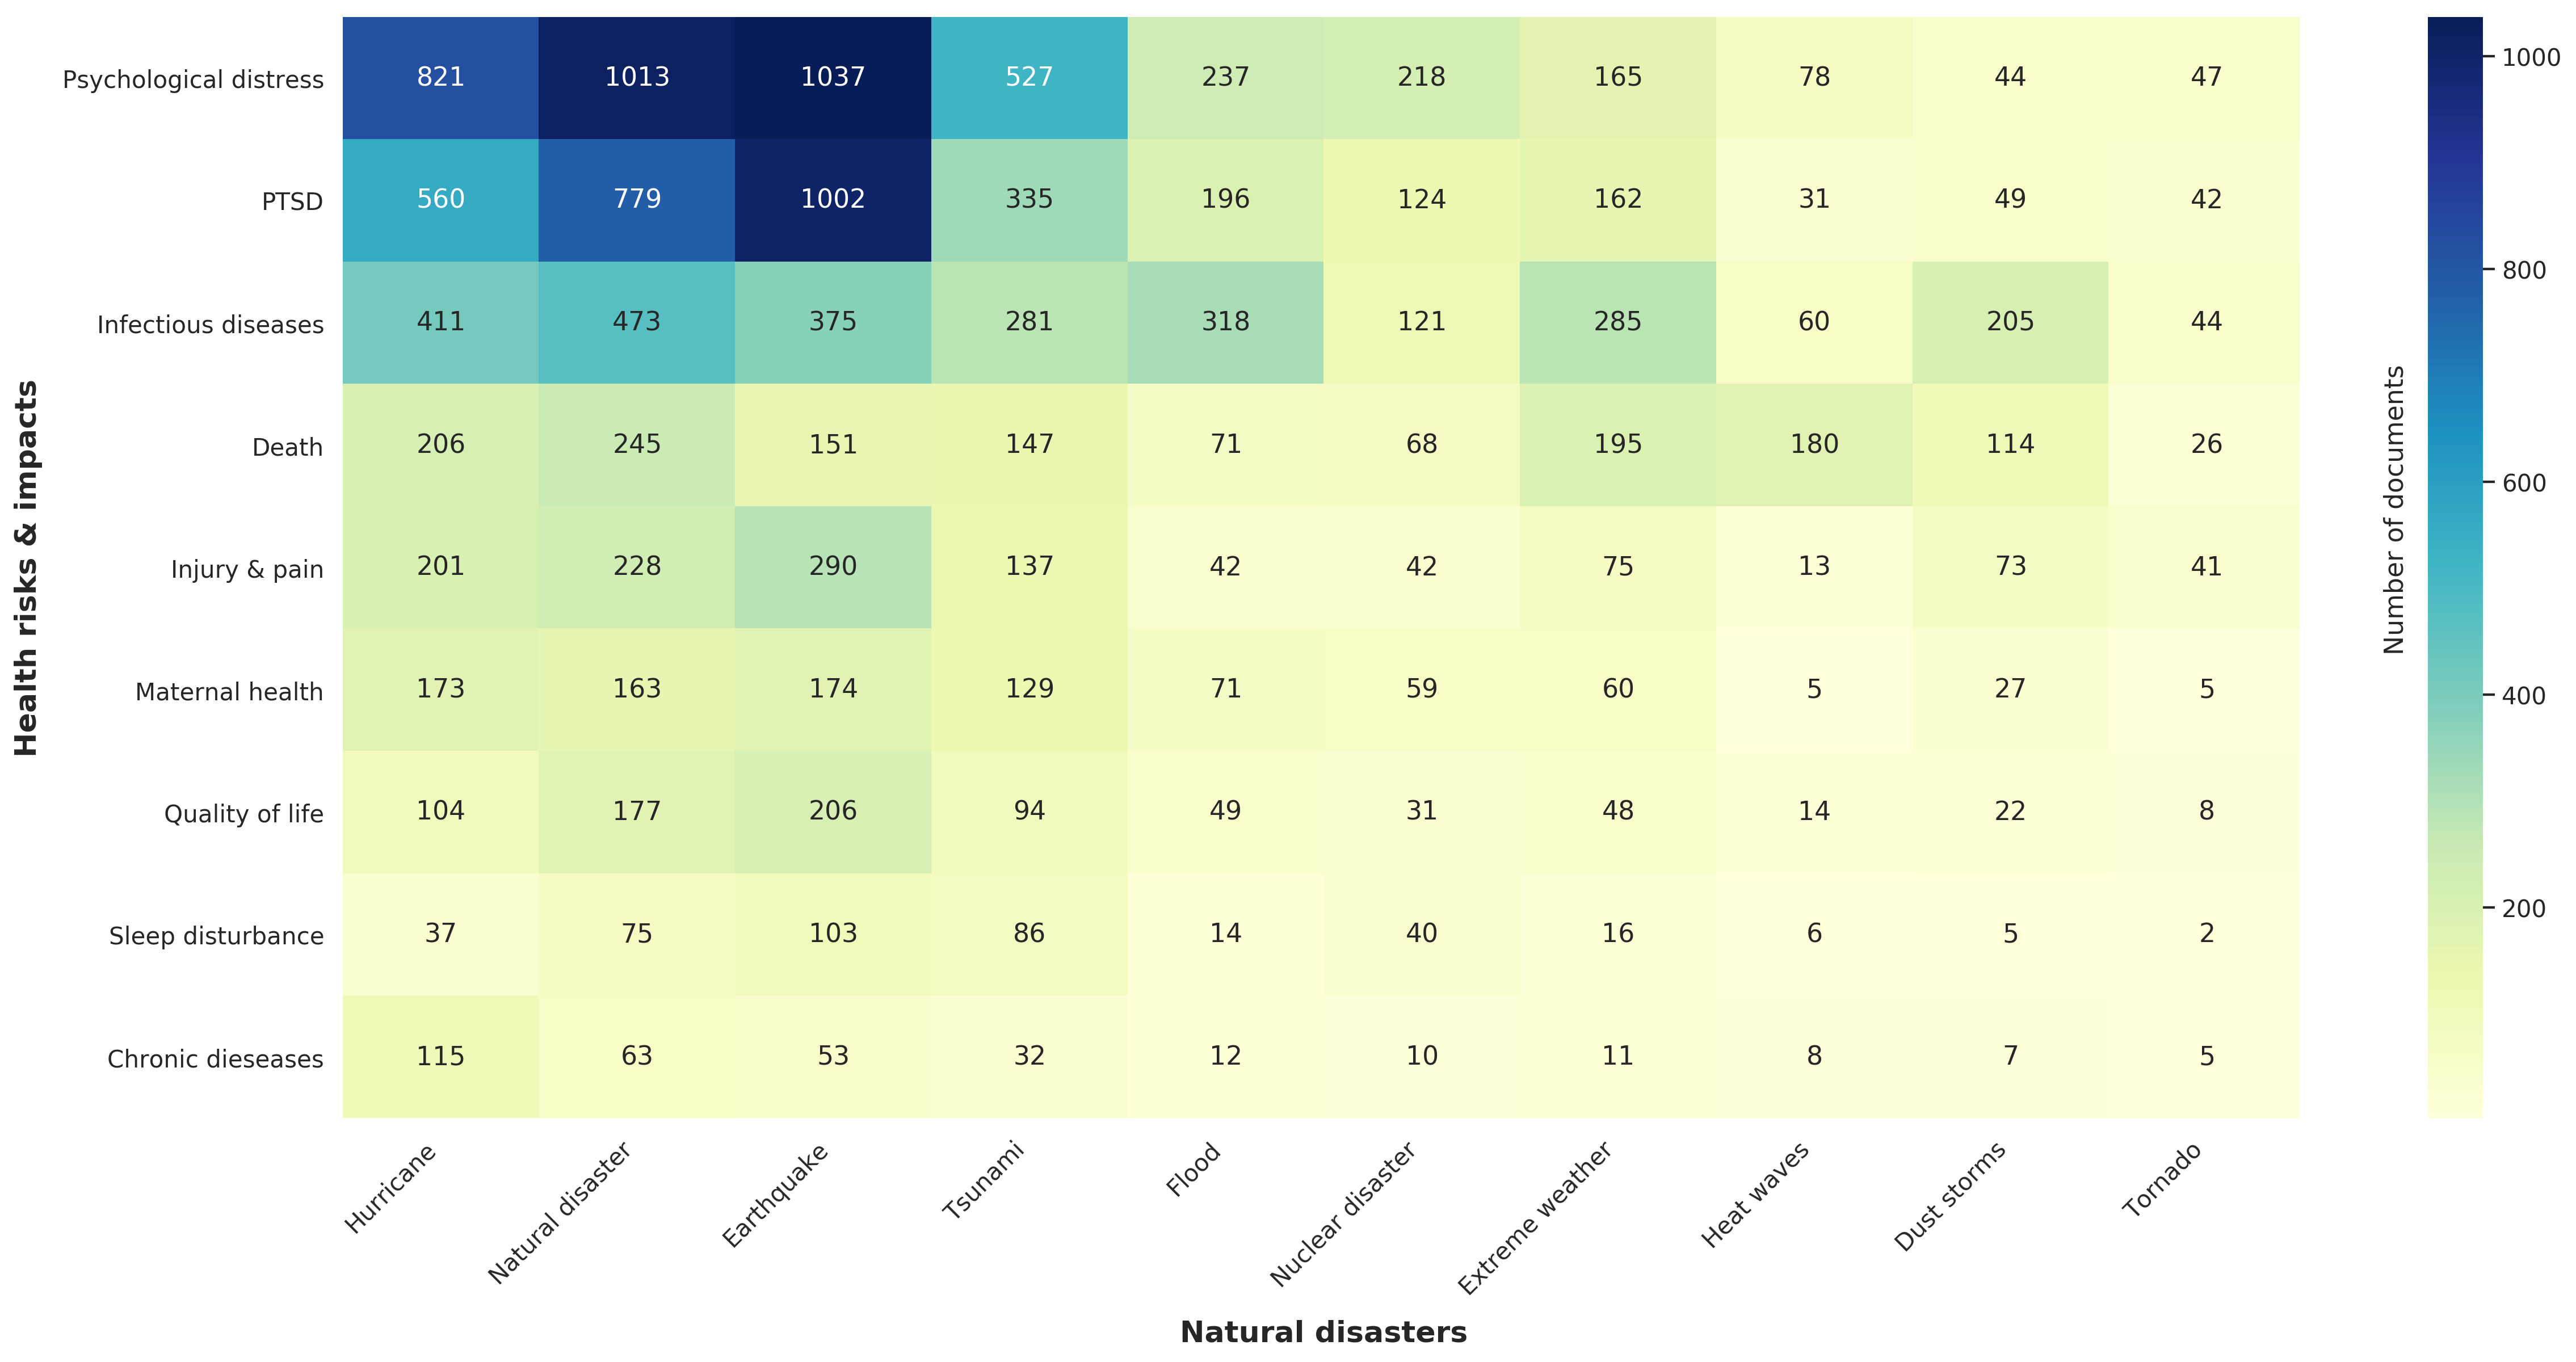

In [15]:
#combine_agg_index = disaster_agg_index + option_agg_index
#combine_agg_names = disaster_agg_names + option_agg_names
file_path="/home/linyu.linyu/health/data/cls_output/figure_out/figure6B.pdf"

heat_map_plot(
    health_agg_index, health_agg_names, 
    disaster_agg_index, disaster_agg_names, 
      y_label='Health risks and impacts',
      x_label="Natural disasters",
    file_path=file_path,
    plt_loc=[10.4, 3],
)


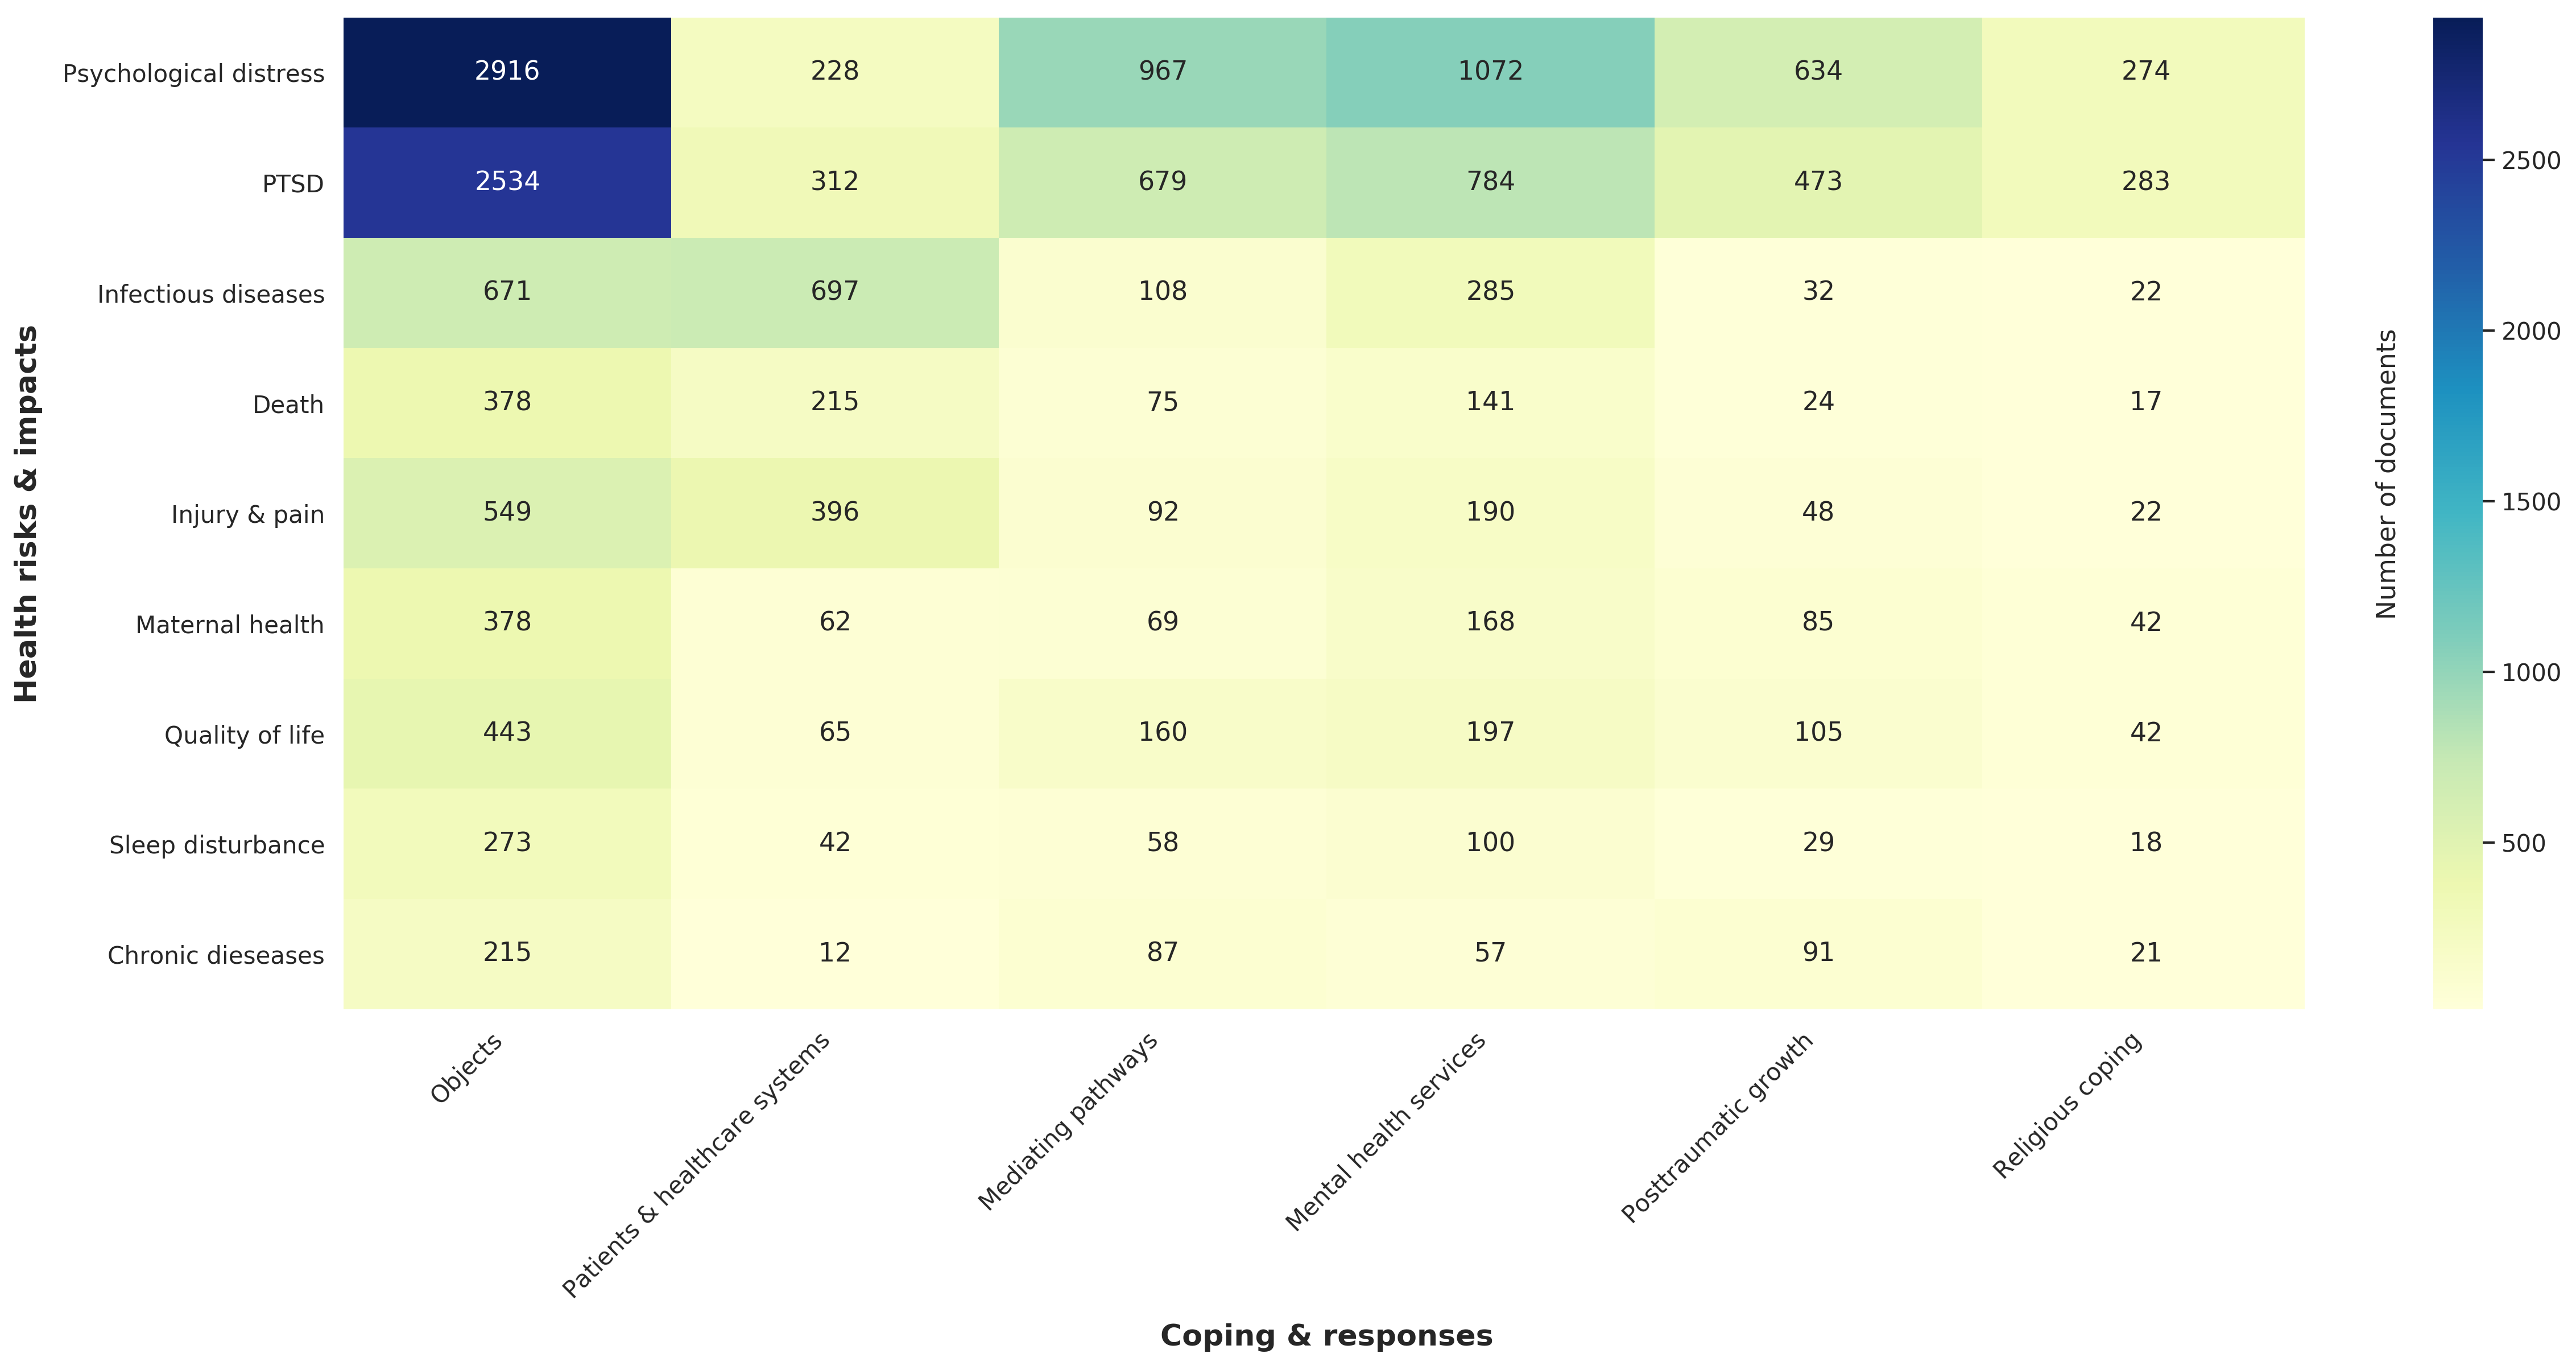

In [16]:
file_path="/home/linyu.linyu/health/data/cls_output/figure_out/figure6C.pdf"

heat_map_plot(
    health_agg_index, health_agg_names, 
    option_agg_index, option_agg_names, 
      y_label='Health risks and impacts',
      x_label="Coping and responses",
     file_path=file_path,
    plt_loc=[6.2, 3],
)


## plot two figures in one figure

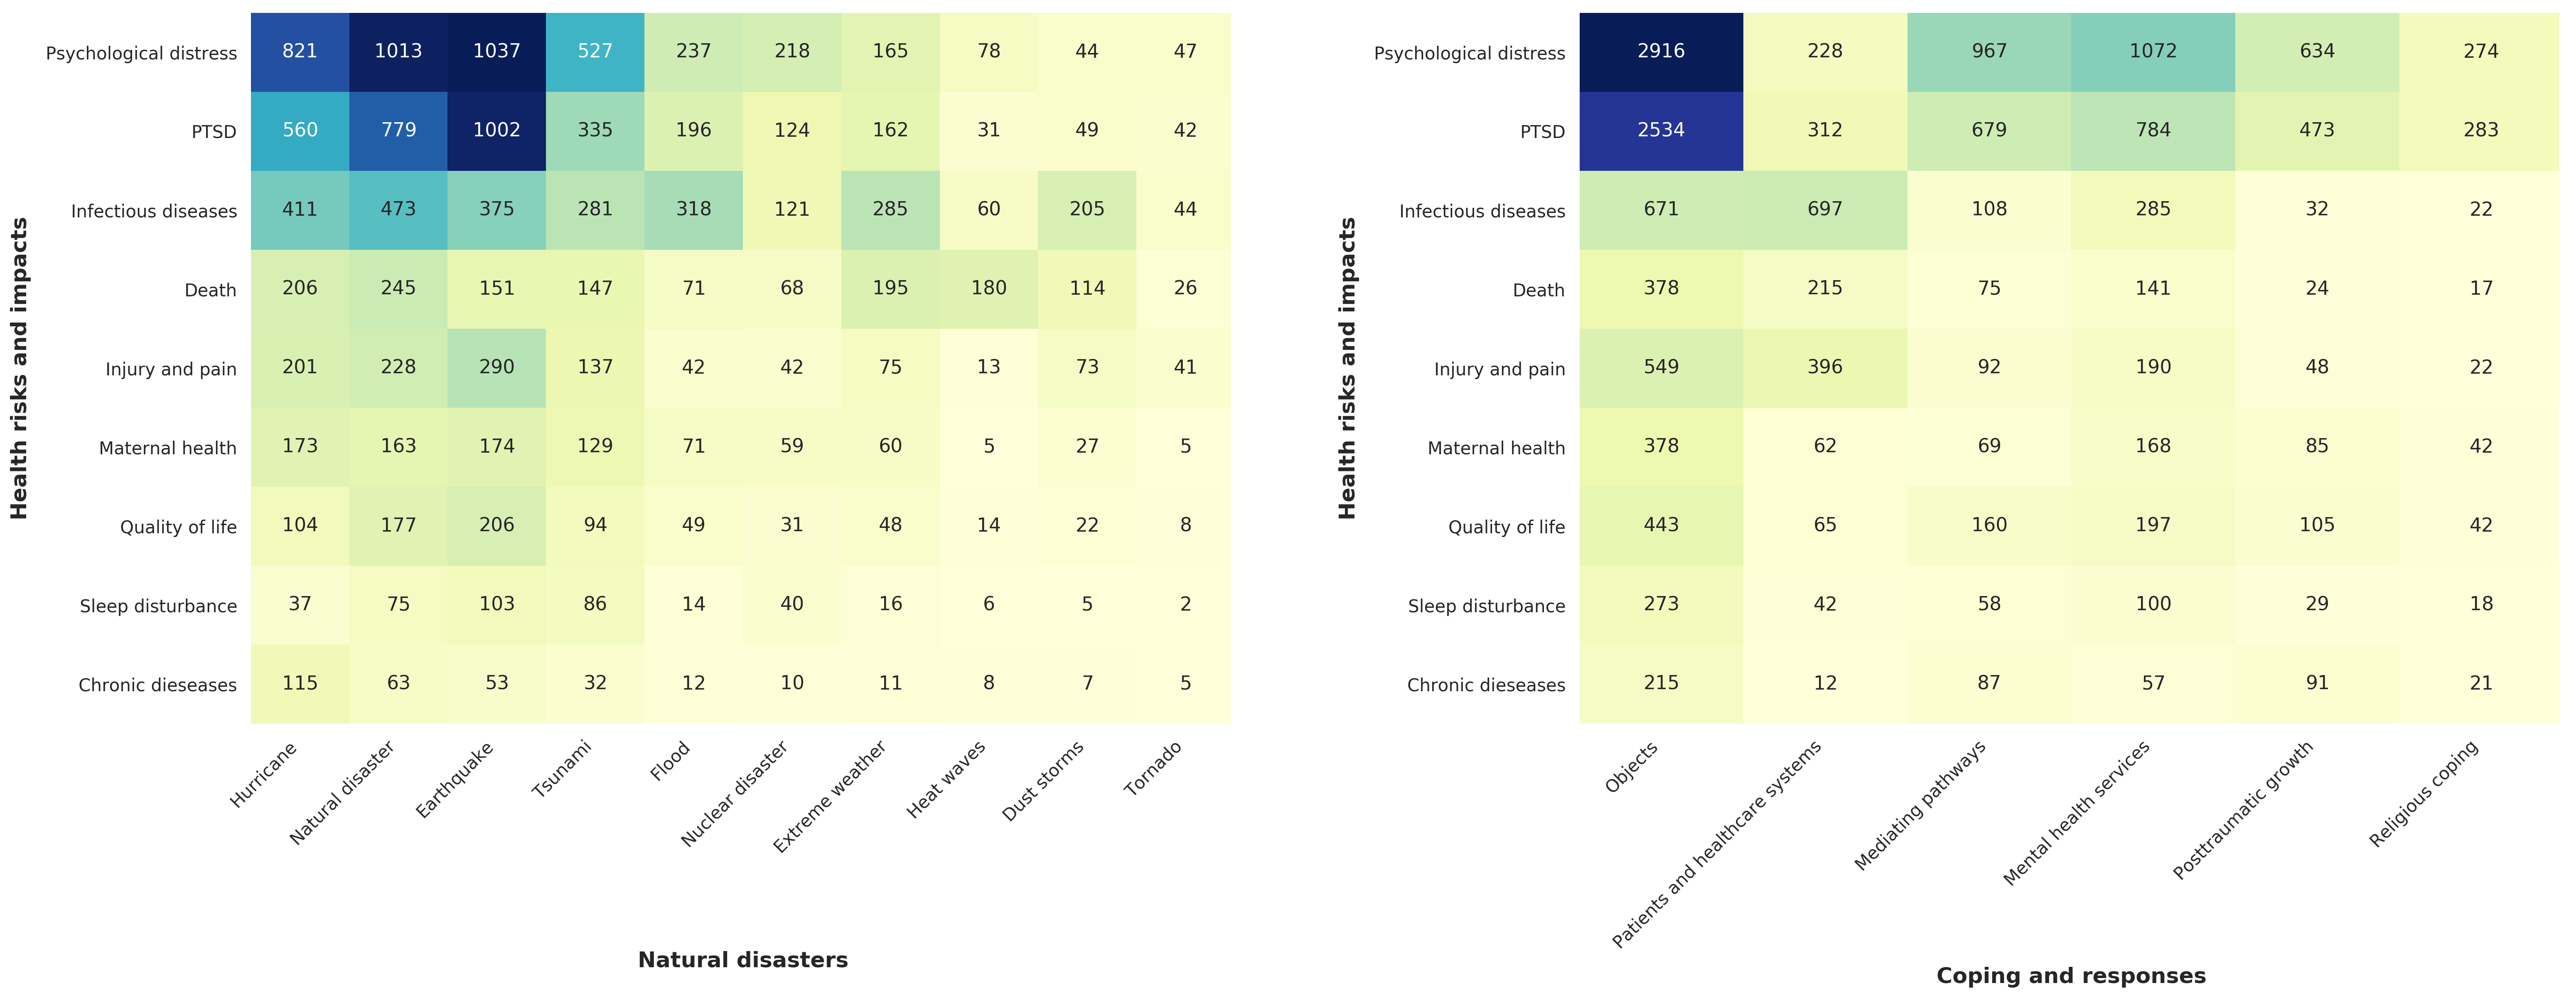

In [43]:

def TitleAndSave(fig, ax, title, subtitle,  file_path=None):
    #ax.text(x=0.5, y=1.1, s=title, fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=1.05, s=subtitle, fontsize=10, ha='center', va='bottom', transform=ax.transAxes)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    if file_path:
        fig.savefig(file_path, dpi=250, bbox_inches="tight")
    #fig.savefig(f'heatmap_results/Final/{title}_{subtitle}.png')
    plt.show()
    return fig, ax
    
    
def process_data( x_index, x_names, y_index, y_names,  ):
    x_axis_cnt = len(x_index)
    y_axis_cnt = len(y_index)
    doc_agg_counts = np.zeros((x_axis_cnt, y_axis_cnt), dtype=np.int)
    for plt_i, topic_i_list in enumerate(x_index):
        for plt_j, topic_j_list in enumerate(y_index):
            doc_cnt = 0
            for topic_i in topic_i_list:
                for topic_j in topic_j_list:
                    topic_related_x = doc2topic[:,topic_i] >= score_th
                    topic_related_y = doc2topic[:,topic_j] >= score_th
                    topic_both_related = sum( topic_related_x & topic_related_y)
                    doc_cnt += topic_both_related
            doc_agg_counts[plt_i,plt_j] = doc_cnt
    yticks = x_names #health_agg_names
    xticks = y_names #combine_agg_names
    return xticks, yticks, doc_agg_counts
    
    
def heat_map_plot(
    x_index, x_names, y_index, y_names, 
    x_label="x_label",
    y_label="y_label",
    file_path=None,
    plt_loc=None,
    left=True,
    ):

    
    
    
    if left:
        plt.subplot(121)
    else:
        plt.subplot(122)
    
    
    ax.axvline(doc_agg_counts.shape[1], color='white', lw=6)
    sns.heatmap(doc_agg_counts, ax=ax, cmap="YlGnBu",annot=True, fmt="d")

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_yticklabels(yticks, rotation=0)

    
    
    plt.xlabel(x_label, weight = 'bold', fontsize=15, labelpad=10)
    plt.ylabel(y_label, weight = 'bold', fontsize=15, labelpad=10)
    #if plt_loc:
    #    plt.text( plt_loc[0] , plt_loc[1], "Number of documents", rotation=90,) # fontsize=10 )
    #plt.text( 10.4, 3, "Number of documents", rotation=90,) # fontsize=10 )
    #title = 'Co-occurrence of Hazards and Health Risks & Impacts'
    #subtitle = "Number of documents with co-occuring topics above threshold %.3f"%(score_th)
    #TitleAndSave(fig, ax, title, subtitle, file_path)

    
#health_agg_index, health_agg_names
#disaster_agg_index, disaster_agg_names 
#option_agg_index, option_agg_names 


fig, ax = plt.subplots(1,2, figsize=(25,10),dpi=250)

sns.set(font_scale=1.1)

ax_figure=0
ax_ = ax[ax_figure]
y_label='Health risks and impacts'
x_label="Natural disasters"
xticks, yticks,doc_agg_counts = process_data( health_agg_index, health_agg_names,  disaster_agg_index, disaster_agg_names, )
ax_.axvline(doc_agg_counts.shape[1], color='white', lw=6)
sns.heatmap(doc_agg_counts, ax=ax_, cmap="YlGnBu",annot=True, fmt="d", cbar=False) # cbar_kws={"orientation": "horizontal"})

ax_.set_xticklabels(xticks, rotation=45, ha="right")
ax_.set_yticklabels(yticks, rotation=0)
ax_.set_xlabel(x_label, weight = 'bold', fontsize=15, labelpad=65)
ax_.set_ylabel(y_label, weight = 'bold', fontsize=15, labelpad=10)


ax_figure=1
ax_ = ax[ax_figure]
y_label='Health risks and impacts'
x_label="Coping and responses"
xticks, yticks,doc_agg_counts = process_data( health_agg_index, health_agg_names,  option_agg_index, option_agg_names,  )
ax_.axvline(doc_agg_counts.shape[1], color='white', lw=6)
sns.heatmap(doc_agg_counts, ax=ax_, cmap="YlGnBu",annot=True, fmt="d", cbar=False) # cbar_kws={"orientation": "horizontal"})
ax_.set_xticklabels(xticks, rotation=45, ha="right")
ax_.set_yticklabels(yticks, rotation=0)
ax_.set_xlabel(x_label, weight = 'bold', fontsize=15, labelpad=10)
ax_.set_ylabel(y_label, weight = 'bold', fontsize=15, labelpad=10)

fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.subplots_adjust(wspace =0.35, hspace =0)

file_path="/home/linyu.linyu/health.research/health/data/cls_output/figure_out/figure6BC.pdf"
fig.savefig(file_path, dpi=250, bbox_inches="tight")
plt.show()



## Count every topic related docs

In [170]:
##score_th
doc_cnts = list()
for i in range(40):
    topic_idx = int( topic_names['Topic_idx'].iloc[i] )
    doc_cnts.append( np.sum( doc2topic[:, topic_idx] >= score_th ) )
topic_names['related_docs'] = doc_cnts
out_fp = "/home/linyu.linyu/health/data/cls_output/figure_out/topic_related_docs.csv"
topic_names.to_csv(out_fp)

In [169]:
topic_names.head(10)
del topic_names['Coherence_score']

527

In [161]:
score_th

0.015